# DNN: analysis with Keras of 2D data

In [960]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

%run nonlinear_function.py

# training data
perc_train = 0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

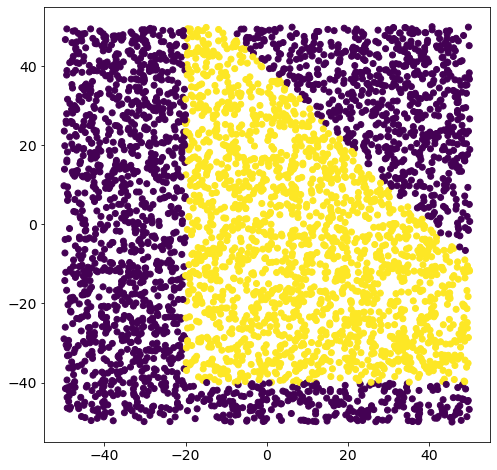

In [961]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [962]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [963]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
np.std(x_train)

0.5767417983028844

### Define the model with Keras

In [964]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    np.random.seed(1234)
    tf.random.set_seed(1234)
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(3,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_599 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_600 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_601 (Dense)            (None, 20)                420       
_________________________________________________________________
dropout_150 (Dropout)        (None, 20)                0         
_________________________________________________________________
dense_602 (Dense)            (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [965]:
model.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

### Training

In [966]:
fit = model.fit(x_train, y_train,
               epochs = 500, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/500
64/64 - 0s - loss: 0.6649 - accuracy: 0.5425 - val_loss: 0.6400 - val_accuracy: 0.5750
Epoch 2/500
64/64 - 0s - loss: 0.6247 - accuracy: 0.6447 - val_loss: 0.5929 - val_accuracy: 0.6975
Epoch 3/500
64/64 - 0s - loss: 0.5804 - accuracy: 0.7222 - val_loss: 0.5456 - val_accuracy: 0.7325
Epoch 4/500
64/64 - 0s - loss: 0.5312 - accuracy: 0.7684 - val_loss: 0.4915 - val_accuracy: 0.7837
Epoch 5/500
64/64 - 0s - loss: 0.4642 - accuracy: 0.8069 - val_loss: 0.4281 - val_accuracy: 0.8413
Epoch 6/500
64/64 - 0s - loss: 0.4040 - accuracy: 0.8384 - val_loss: 0.3688 - val_accuracy: 0.8525
Epoch 7/500
64/64 - 0s - loss: 0.3550 - accuracy: 0.8637 - val_loss: 0.3298 - val_accuracy: 0.8725
Epoch 8/500
64/64 - 0s - loss: 0.3253 - accuracy: 0.8813 - val_loss: 0.3136 - val_accuracy: 0.8888
Epoch 9/500
64/64 - 0s - loss: 0.3073 - accuracy: 0.8909 - val_loss: 0.2941 - val_accuracy: 0.9013
Epoch 10/500
64/64 - 0s - loss: 0.2968 - accuracy: 0.8966 - val_loss: 0.2866 - val_accuracy: 0.8988
Epoch 11/

### Plotting

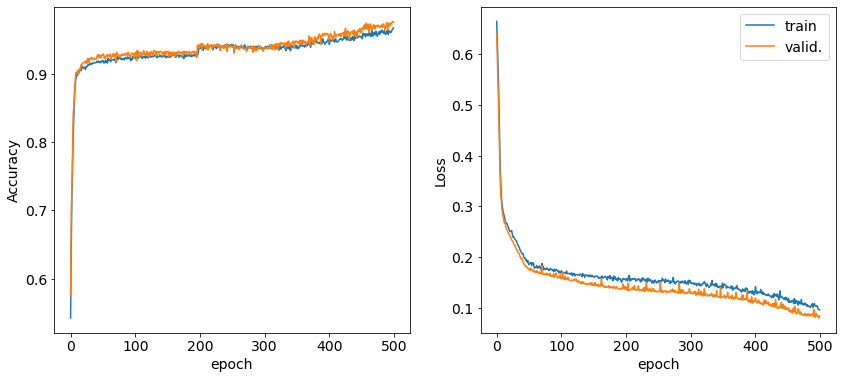

In [967]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

## Model evaluation

In [969]:
loss_val = fit.history['val_loss']
val_accuracy = fit.history['val_accuracy']
min_val_loss=min(loss_val)
max_val_accuracy=max(val_accuracy)
print("min_val_loss :",min_val_loss)
print("max_val_accuracy :",max_val_accuracy)
# min_val_loss : 0.07938096672296524
# max_val_accuracy : 0.9762499928474426

min_val_loss : 0.07938096672296524
max_val_accuracy : 0.9762499928474426


 ### Results
 epoch = 500, batch size = 50
 min_val_loss : 0.07938096672296524,
 max_val_accuracy : 0.9762499928474426

# Data augmentation part 

## 10% data augmented

In [939]:
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

In [940]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

Epoch 1/500
71/71 - 0s - loss: 0.6652 - accuracy: 0.5523 - val_loss: 0.6369 - val_accuracy: 0.6575
Epoch 2/500
71/71 - 0s - loss: 0.6206 - accuracy: 0.6673 - val_loss: 0.5823 - val_accuracy: 0.7188
Epoch 3/500
71/71 - 0s - loss: 0.5632 - accuracy: 0.7412 - val_loss: 0.5215 - val_accuracy: 0.7713
Epoch 4/500
71/71 - 0s - loss: 0.4990 - accuracy: 0.7974 - val_loss: 0.4579 - val_accuracy: 0.8175
Epoch 5/500
71/71 - 0s - loss: 0.4336 - accuracy: 0.8250 - val_loss: 0.3925 - val_accuracy: 0.8512
Epoch 6/500
71/71 - 0s - loss: 0.3755 - accuracy: 0.8534 - val_loss: 0.3431 - val_accuracy: 0.8675
Epoch 7/500
71/71 - 0s - loss: 0.3360 - accuracy: 0.8773 - val_loss: 0.3134 - val_accuracy: 0.8838
Epoch 8/500
71/71 - 0s - loss: 0.3121 - accuracy: 0.8915 - val_loss: 0.2937 - val_accuracy: 0.8863
Epoch 9/500
71/71 - 0s - loss: 0.2998 - accuracy: 0.8926 - val_loss: 0.2878 - val_accuracy: 0.9013
Epoch 10/500
71/71 - 0s - loss: 0.2935 - accuracy: 0.8960 - val_loss: 0.2780 - val_accuracy: 0.9075
Epoch 11/

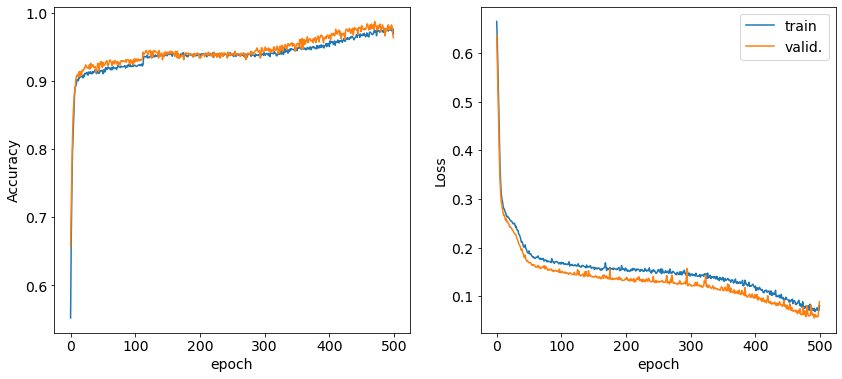

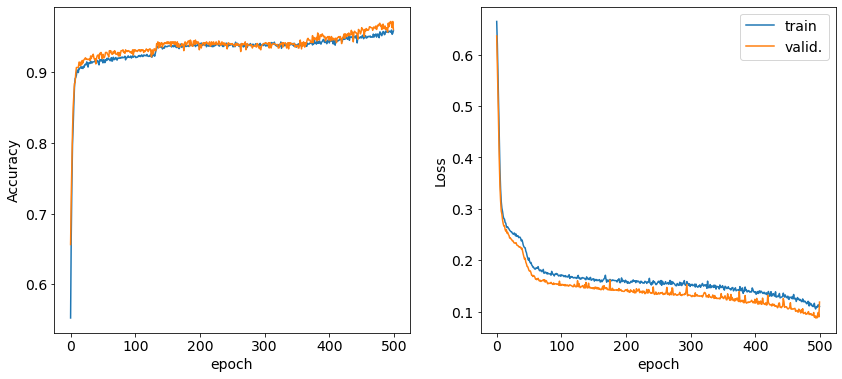

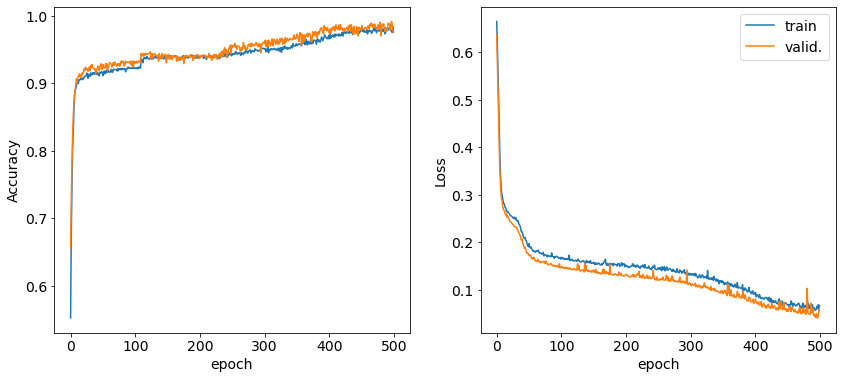

In [941]:
# we want to augment the training samples by creating artifical one's that are similar to the real samples
import tensorflow as tf
# creating the shift s1 and s2
a = np.array([1,2,3])
for i in a:
    np.random.seed(56789)
    s1 = np.random.normal(0,i)
    rand_data1 = x[:,0] + s1
    np.random.seed(13579)
    s2 = np.random.normal(0,i)
    rand_data2 = x[:,1] + s2

    # we have 3200 training samples, I chose to add 10% augmented ones, so 320
    rand_data1 = rand_data1[0:320].reshape((320,1))
    rand_data2 = rand_data2[0:320].reshape((320,1))

    # making an array of random data (320 samples) 
    new_augmented_data = np.concatenate((rand_data1,rand_data2),axis=1)

    # training data = old data + augmented ones 
    data = x[0:3200] # we choose only the first 3200 samples to add the new data to
    data = np.concatenate((x[0:3200],new_augmented_data),axis = 0)

# generating the labels for our new training data (3520 samples)
    N = 3520
    new_labels = np.zeros(N)
    for i in range(N):
        new_labels[i] = f(data[i],TYPE)
    (x_train, y_train) = (data,new_labels)
    (x_valid, y_valid) = (x[N_train:],y[N_train:])
    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)
    
    #reproducibility
    CASE = 1
    np.random.seed(1234)
    tf.random.set_seed(1234)
    if CASE == 1:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400
    if CASE == 2:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400

    model.compile(loss = "binary_crossentropy",
                  #optimizer = "RMSprop",
                  optimizer = "adam",
                  metrics = ["accuracy"])
    fit = model.fit(x_train,y_train,
                epochs = 500, batch_size = 50,
                validation_data = (x_valid,y_valid),
                verbose = 2)
    
    #plotting
    fig,AX=plt.subplots(1,2,figsize=(14,6.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],label="train")
    ax.plot(fit.history['val_accuracy'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax=AX[1]
    ax.plot(fit.history['loss'],label="train")
    ax.plot(fit.history['val_loss'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.legend()
    
    #model evaluation
    loss_val = fit.history['val_loss']
    val_accuracy = fit.history['val_accuracy']
    min_val_loss=min(loss_val)
    max_val_accuracy=max(val_accuracy)
    print("min_val_loss :",min_val_loss)
    print("max_val_accuracy :",max_val_accuracy)

 ### Results
 std of 1, epoch = 500, batch size = 50
 min_val_loss : 0.05499040707945824,
 max_val_accuracy : 0.987500011920929

 std of 2, epoch = 500, batch size = 50
 min_val_loss : 0.0874069407582283,
 max_val_accuracy : 0.9712499976158142

 std of 3, epoch = 500, batch size = 50
 min_val_loss : 0.04049699753522873,
 max_val_accuracy : 0.9912499785423279

## 20 % data augmented

In [947]:
# number of data
N=4000
# size of each sample
L=2
# box size
B=100

In [948]:
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')

In [949]:
# we want to augment the training samples by creating artifical one's that are similar to the real samples

# creating the shift s1 and s2
np.random.seed(56789)
s1 = np.random.normal(0,1)
rand_data1 = x[:,0] + s1
np.random.seed(13579)
s2 = np.random.normal(0,1)
rand_data2 = x[:,1] + s2

# we have 3200 training samples, I chose to add 20% augmented ones, so 640
rand_data1 = rand_data1[0:640].reshape((640,1))
rand_data2 = rand_data2[0:640].reshape((640,1))

# making an array of random data (640 samples) 
new_augmented_data = np.concatenate((rand_data1,rand_data2),axis=1)

# training data = old data + augmented ones 
data = x[0:3200] # we choose only the first 3200 samples to add the new data to
data = np.concatenate((x[0:3200],new_augmented_data),axis = 0)

# generating the labels for our new training data (3840 samples)
N = 3840
new_labels = np.zeros(N)
for i in range(N):
    new_labels[i] = f(data[i],TYPE)

Epoch 1/500
77/77 - 0s - loss: 0.6628 - accuracy: 0.5609 - val_loss: 0.6323 - val_accuracy: 0.6137
Epoch 2/500
77/77 - 0s - loss: 0.6125 - accuracy: 0.6750 - val_loss: 0.5734 - val_accuracy: 0.7262
Epoch 3/500
77/77 - 0s - loss: 0.5503 - accuracy: 0.7464 - val_loss: 0.5059 - val_accuracy: 0.7825
Epoch 4/500
77/77 - 0s - loss: 0.4745 - accuracy: 0.8049 - val_loss: 0.4302 - val_accuracy: 0.8313
Epoch 5/500
77/77 - 0s - loss: 0.4018 - accuracy: 0.8391 - val_loss: 0.3654 - val_accuracy: 0.8637
Epoch 6/500
77/77 - 0s - loss: 0.3493 - accuracy: 0.8669 - val_loss: 0.3214 - val_accuracy: 0.8850
Epoch 7/500
77/77 - 0s - loss: 0.3192 - accuracy: 0.8880 - val_loss: 0.3014 - val_accuracy: 0.8950
Epoch 8/500
77/77 - 0s - loss: 0.3015 - accuracy: 0.8917 - val_loss: 0.2856 - val_accuracy: 0.9025
Epoch 9/500
77/77 - 0s - loss: 0.2920 - accuracy: 0.8974 - val_loss: 0.2777 - val_accuracy: 0.9062
Epoch 10/500
77/77 - 0s - loss: 0.2853 - accuracy: 0.9018 - val_loss: 0.2701 - val_accuracy: 0.9087
Epoch 11/

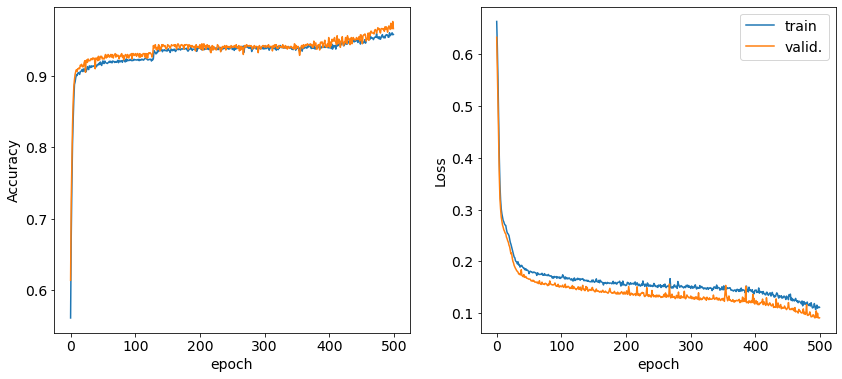

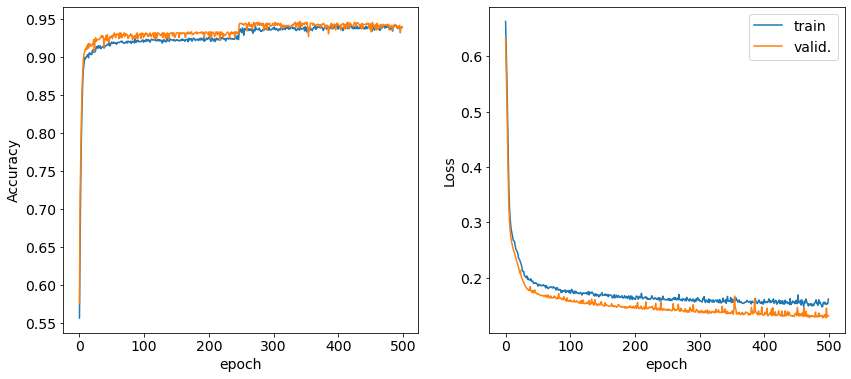

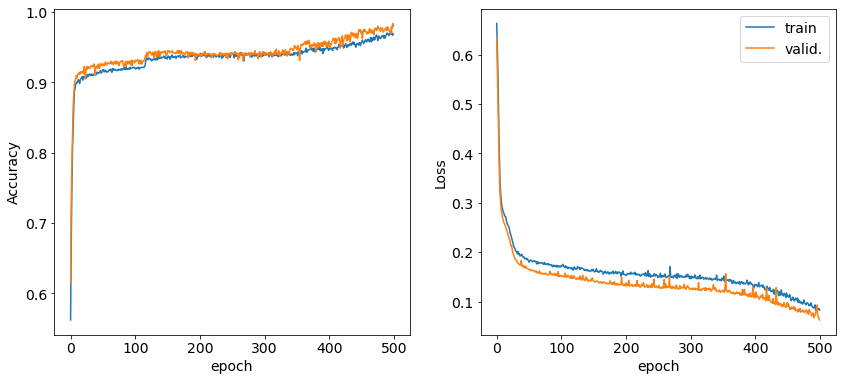

In [950]:
# we want to augment the training samples by creating artifical one's that are similar to the real samples
import tensorflow as tf
# creating the shift s1 and s2
a = np.array([1,2,3])
for i in a:
    np.random.seed(56789)
    s1 = np.random.normal(0,i)
    rand_data1 = x[:,0] + s1
    np.random.seed(13579)
    s2 = np.random.normal(0,i)
    rand_data2 = x[:,1] + s2

    # we have 3200 training samples, I chose to add 20% augmented ones, so 640
    rand_data1 = rand_data1[0:640].reshape((640,1))
    rand_data2 = rand_data2[0:640].reshape((640,1))

    # making an array of random data (640 samples) 
    new_augmented_data = np.concatenate((rand_data1,rand_data2),axis=1)

    # training data = old data + augmented ones 
    data = x[0:3200] # we choose only the first 3200 samples to add the new data to
    data = np.concatenate((x[0:3200],new_augmented_data),axis = 0)

# generating the labels for our new training data (3520 samples)
    N = 3840
    new_labels = np.zeros(N)
    for i in range(N):
        new_labels[i] = f(data[i],TYPE)
    (x_train, y_train) = (data,new_labels)
    (x_valid, y_valid) = (x[N_train:],y[N_train:])
    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)
    
    #reproducibility
    np.random.seed(12345)
    CASE = 1
    np.random.seed(1234)
    tf.random.set_seed(1234)
    if CASE == 1:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dense(20, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400
    if CASE == 2:
        model = Sequential()
        model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
        model.add(Dense(3, activation='sigmoid'))
        model.add(Dense(1, activation='sigmoid'))
        nepoch = 400

    model.compile(loss = "binary_crossentropy",
                  #optimizer = "RMSprop",
                  optimizer = "adam",
                  metrics = ["accuracy"])
    fit = model.fit(x_train,y_train,
                epochs = 500, batch_size = 50,
                validation_data = (x_valid,y_valid),
                verbose = 2)
    
    #plotting
    fig,AX=plt.subplots(1,2,figsize=(14,6.))
    ax=AX[0]
    ax.plot(fit.history['accuracy'],label="train")
    ax.plot(fit.history['val_accuracy'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Accuracy")
    ax=AX[1]
    ax.plot(fit.history['loss'],label="train")
    ax.plot(fit.history['val_loss'],label="valid.")
    ax.set_xlabel('epoch')
    ax.set_ylabel("Loss")
    ax.legend()
    
    #model evaluation
    loss_val = fit.history['val_loss']
    val_accuracy = fit.history['val_accuracy']
    min_val_loss=min(loss_val)
    max_val_accuracy=max(val_accuracy)
    print("min_val_loss :",min_val_loss)
    print("max_val_accuracy :",max_val_accuracy)

 ### Results
 std of 1, epoch = 500, batch size = 50
 min_val_loss : 0.0908706784248352,
 max_val_accuracy : 0.9762499928474426

 std of 2, epoch = 500, batch size = 50
 min_val_loss : 0.12722459435462952,
 max_val_accuracy : 0.9462500214576721

 std of 3, epoch = 500, batch size = 50
 min_val_loss : 0.06277084350585938,
 max_val_accuracy : 0.9837499856948853